<a href="https://colab.research.google.com/github/lawrenceN/ASPBaseApp/blob/master/Discovering_Outbreaks_from_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting City and Country Information from News

Parse the News headlines. Specifically we want to find any city and/or country names mentioned in each of the news headlines. We then will use the names to find geographical locations of the headlines. 




1.   Load the data
2.   Use regular expressions and the cities and coutries using geonamescache library ( match any cities/countries with a news item.
3. The extracted data will be put in Pandas DataFrame with the columns: healine, city, country 
4. Check that no issues exist on the data (by sampling)
5. Save the data that will have no issues 



## Read the Data

In [1]:
with open('/content/headlines')as file:
  myData=[headlines.strip() for headlines in file]

In [2]:
type(myData)

list

In [3]:
myData[1:4]

['Could Zika Reach New York City?',
 'First Case of Zika in Miami Beach',
 'Mystery Virus Spreads in Recife, Brazil']

## Cities and Countries using Geonamescache library 

In [4]:
!pip install geonamescache
import geonamescache 

     |████████████████████████████████| 839kB 2.8MB/s 


In [5]:
gc=geonamescache.GeonamesCache()
countries=[country['name'] for country in gc.get_countries().values()]

In [6]:
countries[6:609]

['Armenia',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Aland Islands',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Saint Barthelemy',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba ',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos Islands',
 'Democratic Republic of the Congo',
 'Central African Republic',
 'Republic of the Congo',
 'Switzerland',
 'Ivory Coast',
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cabo Verde',
 'Curacao',
 'Christmas Island',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'Micronesia',
 'Far

In [7]:
cities=[city['name'] for city in gc.get_cities().values()]

In [8]:
cities[:7]

['Andorra la Vella',
 'Umm Al Quwain City',
 'Ras Al Khaimah City',
 'Zayed City',
 'Khawr Fakkān',
 'Dubai',
 'Dibba Al-Fujairah']

## Duplicate Cities 

In [9]:
from collections import Counter

In [10]:
city_counts=Counter(cities)


In [11]:
city_counts.most_common(20)

[('Springfield', 8),
 ('San Pedro', 7),
 ('Richmond', 7),
 ('San Fernando', 7),
 ('Mercedes', 6),
 ('La Paz', 6),
 ('Victoria', 6),
 ('San Francisco', 6),
 ('Auburn', 6),
 ('Santa Cruz', 6),
 ('Burlington', 6),
 ('San Carlos', 6),
 ('La Unión', 6),
 ('San Marcos', 6),
 ('San Vicente', 5),
 ('San Lorenzo', 5),
 ('San Isidro', 5),
 ('Santa Rosa', 5),
 ('San Juan', 5),
 ('Lincoln', 5)]

## Removing Accent Marks

In this section we remove the accent marks. We use the unidecode libray method. For the cities and countries from geonamescache, we map the unaccented  name to the accented name

In [12]:
!pip install unidecode
import unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [13]:
country_accent_mapping={unidecode.unidecode(country): country for country in countries}

In [14]:
type(country_accent_mapping)

dict

In [15]:
city_accent_mapping={unidecode.unidecode(city):city for city in cities}

In [16]:
city_accent_mapping['Nairobi']

'Nairobi'

In [17]:
country_accent_mapping['Kenya']

'Kenya'

We remove the accent marks from the headlines so that we can match on the unaccented version (*Keys mappings*)

In [18]:
myData=[unidecode.unidecode(headlines) for headlines in myData]

In [19]:
myData[:4]

['Zika Outbreak Hits Miami',
 'Could Zika Reach New York City?',
 'First Case of Zika in Miami Beach',
 'Mystery Virus Spreads in Recife, Brazil']

We can not look for unaccented city and country names in the headlines

## Searching for data on cities and countries 

Search for headline for any cities and or countries, we use the libray re (regular expressions. 

In [20]:
unaccented_cities =list(city_accent_mapping.keys())

In [21]:
unaccented_cities

['Andorra la Vella',
 'Umm Al Quwain City',
 'Ras Al Khaimah City',
 'Zayed City',
 'Khawr Fakkan',
 'Dubai',
 'Dibba Al-Fujairah',
 'Dibba Al-Hisn',
 'Sharjah',
 'Ar Ruways',
 'Al Fujairah City',
 'Al Ain City',
 'Ajman City',
 'Adh Dhayd',
 'Abu Dhabi',
 'Khalifah A City',
 'Bani Yas City',
 'Musaffah',
 'Al Shamkhah City',
 'Reef Al Fujairah City',
 'Zaranj',
 'Taloqan',
 'Shindand',
 'Shibirghan',
 'Shahrak',
 'Sar-e Pul',
 'Sang-e Charak',
 'Aibak',
 'Rustaq',
 'Qarqin',
 'Qarawul',
 'Pul-e Khumri',
 'Paghman',
 'Nahrin',
 'Maymana',
 'Mehtar Lam',
 'Mazar-e Sharif',
 'Lashkar Gah',
 'Kushk',
 'Kunduz',
 'Khost',
 'Khulm',
 'Khash',
 'Khanabad',
 'Karukh',
 'Kandahar',
 'Kabul',
 'Jalalabad',
 'Jabal os Saraj',
 'Herat',
 'Ghormach',
 'Ghazni',
 'Gereshk',
 'Gardez',
 'Fayzabad',
 'Farah',
 'Kafir Qala',
 'Charikar',
 'Baraki Barak',
 'Bamyan',
 'Balkh',
 'Baghlan',
 'Art Khwajah',
 'Asmar',
 'Asadabad',
 'Andkhoy',
 'Bazarak',
 'Markaz-e Woluswali-ye Achin',
 "Saint John's",
 'Th

In [22]:
unaccented_countries =set(country_accent_mapping.keys())

In [23]:
type(unaccented_countries)

set

In [24]:
print(f'There are {len(unaccented_cities)} cities to look through.')
print(f'There are {len(unaccented_countries)} countries to look through')

There are 23022 cities to look through.
There are 252 countries to look through


## Regular Expressions

We create two regular expressions for searching the headlines. We check for the ciy and the country. 

1.   Martching must be the entire words \bcity_name\b
2.   Find the entire city 



##Partial Match Issue

In [25]:
import re 
problem_city='San Jose'
re.search('\\bSan\\b|\\bSan Jose\\b',problem_city)

<_sre.SRE_Match object; span=(0, 3), match='San'>

In [26]:
problem_city

'San Jose'

In [27]:
re.search('\\bSan Jose\\b|\\bSan\\b',problem_city)

<_sre.SRE_Match object; span=(0, 8), match='San Jose'>

In [28]:
problem_city

'San Jose'

We first sort the cities from the langest to the shortest. 

## Sort Cities and Countries by Length

In [29]:
unaccented_cities=sorted(unaccented_cities,key=lambda x: len(x),reverse=True)

In [30]:
unaccented_cities[:200]

['Chak Two Hundred Forty-nine Thal Development Authority',
 'Dolores Hidalgo Cuna de la Independencia Nacional',
 'Ampliacion San Mateo (Colonia Solidaridad)',
 'Licenciado Benito Juarez (Campo Gobierno)',
 'Sant Pere, Santa Caterina i La Ribera',
 'Palikir - National Government Center',
 'Nanchital de Lazaro Cardenas del Rio',
 'San Fernando del Valle de Catamarca',
 "el Camp d'en Grassot i Gracia Nova",
 'San Martin Texmelucan de Labastida',
 'Acilia-Castel Fusano-Ostia Antica',
 'Chak One Hundred Twenty Nine Left',
 'Sydney Central Business District',
 'Brandys nad Labem-Stara Boleslav',
 'Rosignano Solvay-Castiglioncello',
 'Montecchio Maggiore-Alte Ceccato',
 'Delegacion Cuajimalpa de Morelos',
 'Socorro Mission Number 1 Colonia',
 "l'Antiga Esquerra de l'Eixample",
 'Marina di Ardea-Tor San Lorenzo',
 'Jardines de la Silla (Jardines)',
 'Parque Industrial Ciudad Mitras',
 'Zurich (Kreis 2) / Wollishofen',
 'Zurich (Kreis 6) / Unterstrass',
 'Zurich (Kreis 9) / Albisrieden',
 'Ise

In [31]:
unaccented_countries=sorted(unaccented_countries,key=lambda x:len(x),reverse=True)

In [32]:
unaccented_countries[:20]

['South Georgia and the South Sandwich Islands',
 'United States Minor Outlying Islands',
 'Bonaire, Saint Eustatius and Saba ',
 'Heard Island and McDonald Islands',
 'Democratic Republic of the Congo',
 'Saint Vincent and the Grenadines',
 'British Indian Ocean Territory',
 'French Southern Territories',
 'Saint Pierre and Miquelon',
 'Turks and Caicos Islands',
 'Central African Republic',
 'Northern Mariana Islands',
 'British Virgin Islands',
 'Svalbard and Jan Mayen',
 'Bosnia and Herzegovina',
 'Saint Kitts and Nevis',
 'Serbia and Montenegro',
 'Republic of the Congo',
 'Sao Tome and Principe',
 'Palestinian Territory']

##Constructing the Regular Expression

We construct the regular expressions by joining together the list of strings. The words are separted with a | for the or  sign.  Also use \b tag to make sure we match on entire words (end to end)

In [33]:
city_regex=r'\b|\b'.join(unaccented_cities)


In [34]:
city_regex[1500:1800]

'-Baume\\b|\\bTamuning-Tumon-Harmon Village\\b|\\bTultitlan de Mariano Escobedo\\b|\\bSan Bernardino Tlaxcalancingo\\b|\\bSan Francisco Tlalcilalcalpan\\b|\\bFraccionamiento Ciudad Olmeca\\b|\\bPresidencia Roque Saenz Pena\\b|\\bZurich (Kreis 11) / Oerlikon\\b|\\bSan Fernando de Monte Cristi\\b|\\bPuerto Francisco de '

## Test the city regular expression

In [35]:
import numpy as np


In [36]:
np.random.seed(50)

In [37]:
test_headlines=np.random.choice(myData,10)

In [38]:
test_headlines

array(['More Zika patients reported in Custodia',
       'Tokyo Encounters Severe Symptoms of Meningitis',
       'Zika Troubles come to Kampong Cham',
       '19 new Zika Cases in Sengkang',
       "Mumbai's Health Minister warns of more Zika cases",
       'Varicella re-emerges in Lagos',
       "Mumbai's Health Minister warns of more Zika cases",
       'Milwaukee authorities confirmed the spread of Rhinovirus',
       'Zika cases concern Charlotte residents',
       'Four cases of Zika in Hidalgo County'], dtype='<U87')

In [39]:
for test_headlines in test_headlines:
  print(test_headlines)
  match =re.search(city_regex,test_headlines)
  if match:
    print(match.group(0),'\n')

More Zika patients reported in Custodia
Custodia 

Tokyo Encounters Severe Symptoms of Meningitis
Tokyo 

Zika Troubles come to Kampong Cham
Kampong Cham 

19 new Zika Cases in Sengkang
Sengkang 

Mumbai's Health Minister warns of more Zika cases
Mumbai 

Varicella re-emerges in Lagos
Lagos 

Mumbai's Health Minister warns of more Zika cases
Mumbai 

Milwaukee authorities confirmed the spread of Rhinovirus
Milwaukee 

Zika cases concern Charlotte residents
Charlotte 

Four cases of Zika in Hidalgo County
Hidalgo 



Next we make the regular expression for the countries 


In [40]:
country_regex=r"\b|\b".join(unaccented_countries)

In [41]:
country_regex [:100]

'South Georgia and the South Sandwich Islands\\b|\\bUnited States Minor Outlying Islands\\b|\\bBonaire, S'

In [42]:
np.random.seed(100)
test_headlines=np.random.choice(myData,10)

In [43]:
test_headlines

array(['Longwood volunteers spreading Zika awareness',
       'More Zika cases in Soyapango',
       'Spike of Dengue Cases in Stockholm',
       'Case of Measles Reported in Vancouver',
       'Zika arrives in Belmopan', 'Outbreak of Zika in Colombo',
       'Zika symptoms spotted in Arlington',
       'Malaria re-emerges in Boise',
       'Southampton Patient in Critical Condition after Contracting Tuberculosis',
       'Manassas Encounters Severe Symptoms of Measles'], dtype='<U87')

In [44]:
for test_headline in test_headlines:
  print(test_headline)
  match = re.search(country_regex, test_headline)
  if match:
    print(match.group(0), '\n')

Longwood volunteers spreading Zika awareness
More Zika cases in Soyapango
Spike of Dengue Cases in Stockholm
Case of Measles Reported in Vancouver
Zika arrives in Belmopan
Outbreak of Zika in Colombo
Zika symptoms spotted in Arlington
Malaria re-emerges in Boise
Southampton Patient in Critical Condition after Contracting Tuberculosis
Manassas Encounters Severe Symptoms of Measles


We might not have many countries to work with in this project. Use both the city and the country regex on the headline with a city and a country.

In [45]:
test_headline=myData[3]
print(test_headline)

Mystery Virus Spreads in Recife, Brazil


In [46]:
print(re.search(city_regex, test_headline).group(0))
print(re.search(country_regex,test_headline).group(0))

Recife
Brazil


None of the items campared has the accents. 

## City and Country Regular Expression Function

In [47]:
#We now encapsulate the logic to find the city and the country names into a function. 

In [48]:
def find_city_and_country_in_headline(headline):
  '''
  Find the city (s) and or country(s) in a text headline.
  : headline: string of headline
  : return dict a dictionary mappings the headline to the city (s)  and or contries
  '''
  city_match =re.search(city_regex,headline)
  country_match=re.search(country_regex,headline)
  cities=None if not city_match else city_match.group(0)
  countries=None if not country_match else country_match.group(0)
  return dict(headline=headline, countries=countries, cities=cities)

We test the function 

In [49]:
find_city_and_country_in_headline(myData[10])

{'cities': 'Brownsville',
 'countries': None,
 'headline': 'Brownsville teen contracts Zika virus'}

In [50]:
myData[10]

'Brownsville teen contracts Zika virus'

## Apply the Regular Expression to All Headlines 

We now apply this funcition to all the headlines. and expect to have a list containing all the headlines and the cities or countries in the headlines. 

In [51]:
headline_cities_and_countries=[find_city_and_country_in_headline(headline) for headline in myData]

In [52]:
headline_cities_and_countries[-10:]

[{'cities': 'Clovis',
  'countries': None,
  'headline': 'Authorities are Worried about the Spread of Varicella in Clovis'},
 {'cities': 'Fort Worth',
  'countries': None,
  'headline': 'More Zika patients reported in Fort Worth'},
 {'cities': 'Boynton Beach',
  'countries': None,
  'headline': 'Zika symptoms spotted in Boynton Beach'},
 {'cities': 'Portoviejo',
  'countries': None,
  'headline': 'Outbreak of Zika in Portoviejo'},
 {'cities': 'Muscat',
  'countries': None,
  'headline': 'Influenza Exposure in Muscat'},
 {'cities': 'Jerusalem',
  'countries': None,
  'headline': 'Rumors about Rabies spreading in Jerusalem have been refuted'},
 {'cities': 'Indang',
  'countries': None,
  'headline': 'More Zika patients reported in Indang'},
 {'cities': 'Suva',
  'countries': None,
  'headline': 'Suva authorities confirmed the spread of Rotavirus'},
 {'cities': 'Bella Vista',
  'countries': None,
  'headline': 'More Zika patients reported in Bella Vista'},
 {'cities': 'Wichita Falls',
  '

We can now write this as a json for loading back in. 

## Saving the Data

We can save our list as json. This format can be consumed in base Python and be addeded to a number of libraries.

In [53]:
import json
save_file='/content/headline_cities_and_countries.json'
with open(save_file,'w') as fout:
  fout.write(json.dumps(headline_cities_and_countries))

Let's make sure that we can load the data back

In [54]:
with open(save_file, 'r') as fin:
  check_data=json.loads(fin.read())

In [55]:
check_data[-10:]

[{'cities': 'Clovis',
  'countries': None,
  'headline': 'Authorities are Worried about the Spread of Varicella in Clovis'},
 {'cities': 'Fort Worth',
  'countries': None,
  'headline': 'More Zika patients reported in Fort Worth'},
 {'cities': 'Boynton Beach',
  'countries': None,
  'headline': 'Zika symptoms spotted in Boynton Beach'},
 {'cities': 'Portoviejo',
  'countries': None,
  'headline': 'Outbreak of Zika in Portoviejo'},
 {'cities': 'Muscat',
  'countries': None,
  'headline': 'Influenza Exposure in Muscat'},
 {'cities': 'Jerusalem',
  'countries': None,
  'headline': 'Rumors about Rabies spreading in Jerusalem have been refuted'},
 {'cities': 'Indang',
  'countries': None,
  'headline': 'More Zika patients reported in Indang'},
 {'cities': 'Suva',
  'countries': None,
  'headline': 'Suva authorities confirmed the spread of Rotavirus'},
 {'cities': 'Bella Vista',
  'countries': None,
  'headline': 'More Zika patients reported in Bella Vista'},
 {'cities': 'Wichita Falls',
  '

We can also save the data mappings 

In [56]:
check_data[:4]

[{'cities': 'Miami',
  'countries': None,
  'headline': 'Zika Outbreak Hits Miami'},
 {'cities': 'New York City',
  'countries': None,
  'headline': 'Could Zika Reach New York City?'},
 {'cities': 'Miami Beach',
  'countries': None,
  'headline': 'First Case of Zika in Miami Beach'},
 {'cities': 'Recife',
  'countries': 'Brazil',
  'headline': 'Mystery Virus Spreads in Recife, Brazil'}]

In [57]:
with open('/content/city_accent_mapping.json','w') as fout:
  fout.write(json.dumps(city_accent_mapping))

In [58]:
with open('/content/country_accent_mapping.json','w') as fout:
  fout.write(json.dumps(country_accent_mapping))

## Saving the  data as a DataFrame

We can directly convert our results into a Pandas DataFrame by reading the json. The Pandas DataFrame is like a spreadsheet in python and allows us to quicky analyze and manipulate our data.

In [59]:
import pandas as pd

In [60]:
myData=pd.read_json('/content/headline_cities_and_countries.json')
myData=myData.replace({None:np.nan})


In [61]:
myData.head(15)

,headline,countries,cities
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami Beach
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas
5,Trinidad confirms first Zika case,NaN,Trinidad
6,Zika Concerns are Spreading in Houston,NaN,Houston
7,Geneve Scientists Battle to Find Cure,NaN,Geneve
8,The CDC in Atlanta is Growing Worried,NaN,Atlanta
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo


The output here is what was needed for the first section. Next we use this dataFrame in the next part to find the geographical co-ordinates of the headlines. 

# Finding Geographical Locations of Headlines

## Adding Latitude and Longitude Coordinates

Our objective is to find the geographic location of each headline in latitude and longitude coordinates from the city/country names. Then use the coordinates to perform clustering of the geographically similar headlines.  



1.   Load the DataFrame: Headline, countries and cities
2.   city/country we match the name to the latitude and longitude in the geonamescache 
3. Add longitude and latitude coordinates to the dataFrame. 

Final output: Three additional columns  latitude, longitude and countrycode



## Reading the data into DataFrame

We stored the headline, cities and countries as a json file that had list of dic. We read it into pandas

In [62]:
import pandas as pd
import numpy as np


In [63]:
myData=pd.read_json('/content/headline_cities_and_countries.json')

In [64]:
myData

,headline,countries,cities
0,Zika Outbreak Hits Miami,None,Miami
1,Could Zika Reach New York City?,None,New York City
2,First Case of Zika in Miami Beach,None,Miami Beach
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,None,Dallas
...,...,...,...
645,Rumors about Rabies spreading in Jerusalem hav...,None,Jerusalem
646,More Zika patients reported in Indang,None,Indang
647,Suva authorities confirmed the spread of Rotav...,None,Suva
648,More Zika patients reported in Bella Vista,None,Bella Vista


In [65]:
myData=myData.replace({None:np.nan})

In [66]:
myData

,headline,countries,cities
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami Beach
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas
...,...,...,...
645,Rumors about Rabies spreading in Jerusalem hav...,NaN,Jerusalem
646,More Zika patients reported in Indang,NaN,Indang
647,Suva authorities confirmed the spread of Rotav...,NaN,Suva
648,More Zika patients reported in Bella Vista,NaN,Bella Vista


In [67]:
myData.iloc[3:5]

,headline,countries,cities
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas


we then rename the columns to singular (since they only have one value each)

In [68]:
myData=myData.rename(columns=dict(countries="country", cities='city'))

In [69]:
myData.tail()

,headline,country,city
645,Rumors about Rabies spreading in Jerusalem hav...,NaN,Jerusalem
646,More Zika patients reported in Indang,NaN,Indang
647,Suva authorities confirmed the spread of Rotav...,NaN,Suva
648,More Zika patients reported in Bella Vista,NaN,Bella Vista
649,Zika Outbreak in Wichita Falls,NaN,Wichita Falls


## We explore the Data

In [70]:
myData.describe()

,headline,country,city
count,650,15,608
unique,647,10,574
top,Spanish Flu Outbreak in Lisbon,Malaysia,Miami
freq,2,3,4


We do have duplicate data, and since it looks like one headline is mentioned twice.  We check for duplicates and drop them.  

In [71]:
myData['headline'].value_counts().sort_values().tail()

Rumors about Hepatitis D Spreading in Montreal have been Refuted    1
Harare is infested with Pneumonia                                   1
Barcelona Struck by Spanish Flu                                     2
Spanish Flu Spreading through Madrid                                2
Spanish Flu Outbreak in Lisbon                                      2
Name: headline, dtype: int64

In [72]:
print(f'There are {len(myData)} rows before dropping duplicates.')


There are 650 rows before dropping duplicates.


In [73]:
myData=myData.drop_duplicates()

In [74]:
print(f'There are {len(myData)} rows after dropping duplicates.')


There are 647 rows after dropping duplicates.


In [75]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  647 non-null    object
 1   country   15 non-null     object
 2   city      605 non-null    object
dtypes: object(3)
memory usage: 20.2+ KB


## Explore the data

Let's have a look at the disribution of the countries and cities

In [76]:
myData['country'].value_counts()

Malaysia     3
Brazil       3
Panama       2
Vietnam      1
Guatemala    1
Mexico       1
Hong Kong    1
Singapore    1
Thailand     1
Belize       1
Name: country, dtype: int64

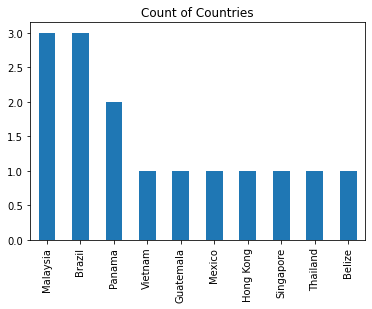

In [77]:
_=myData['country'].value_counts().plot.bar(title ='Count of Countries')

In [78]:
print(f'There are {myData["country"].nunique()} different countries.')

There are 10 different countries.


In [79]:
print(f'There are {myData["city"].nunique()} different cities.')

There are 574 different cities.


We count the 10 most common cities 

In [80]:
myData['city'].value_counts().sort_values().tail(10)

Bedford      2
Fairfield    2
San Jose     2
Cancun       2
Orange       2
Cambridge    2
London       2
Madrid       3
Monroe       4
Miami        4
Name: city, dtype: int64

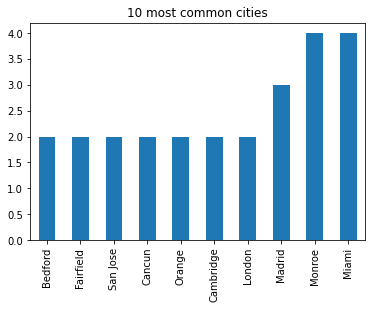

In [81]:
_ = (myData['city'].value_counts().sort_values().tail(10).plot.bar(title="10 most common cities"))

We check that no cites that dominates the headlines.

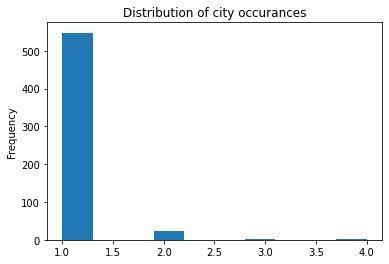

In [82]:
_ =myData['city'].value_counts().plot.hist(title='Distribution of city occurances')

## Adding Latitude and Longitude for Each City

We can now add the latitude and use accented city names. We'll create an accented name column using our mapping from the previsous section

In [83]:
import geonamescache
import unidecode
import json

In [84]:
gc=geonamescache.GeonamesCache()
# we read the saved unaccented_mapping dataset
with open("/content/city_accent_mapping.json",'r') as fin:
  city_accented_mapping=json.loads(fin.read())

#create a column for accented cities
myData['accented_city']=myData['city'].map(city_accented_mapping)
myData[myData['city']!=myData['accented_city']].head(21)

,headline,country,city,accented_city
7,Geneve Scientists Battle to Find Cure,NaN,Geneve,Genève
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo,São Paulo
17,Louisiana Zika cases up to 26,NaN,NaN,NaN
19,Zika infects pregnant woman in Cebu,NaN,NaN,NaN
47,18 new Zika Cases in Bogota,NaN,Bogota,Bogotá
48,Spanish Flu Sighted in Antigua,NaN,NaN,NaN
63,Carnival under threat in Rio De Janeiro due to...,NaN,NaN,NaN
64,Second Zika Paitient in Brasilia,NaN,Brasilia,Brasília
73,Zika case reported in Oton,NaN,NaN,NaN
76,Hillsborough uses innovative trap against Zika...,NaN,NaN,NaN


In [85]:
# As can be seen there are several cases where accented city does not match the orignal city

In [86]:
print(gc.get_cities_by_name('São Paulo'))

[{'3448439': {'geonameid': 3448439, 'name': 'São Paulo', 'latitude': -23.5475, 'longitude': -46.63611, 'countrycode': 'BR', 'population': 10021295, 'timezone': 'America/Sao_Paulo', 'admin1code': '27'}}]


In [87]:
#This explains the importance of using the accented names.

## Handling Duplicates Cities

The approach is as follows: for each city with multiple entries in geonames, we shall choose the city with the greatest population. We can implement this by checking which of the largest entry for each city. since some cities have multiple locations.

In [88]:
city='Boston'
gc.get_cities_by_name(city)

[{'2655138': {'admin1code': 'ENG',
   'countrycode': 'GB',
   'geonameid': 2655138,
   'latitude': 52.97633,
   'longitude': -0.02664,
   'name': 'Boston',
   'population': 41340,
   'timezone': 'Europe/London'}},
 {'4930956': {'admin1code': 'MA',
   'countrycode': 'US',
   'geonameid': 4930956,
   'latitude': 42.35843,
   'longitude': -71.05977,
   'name': 'Boston',
   'population': 667137,
   'timezone': 'America/New_York'}}]

In [89]:
#The Boston US has a large population so we pick it

In [90]:
matches=gc.get_cities_by_name(city)


In [91]:
matches

[{'2655138': {'admin1code': 'ENG',
   'countrycode': 'GB',
   'geonameid': 2655138,
   'latitude': 52.97633,
   'longitude': -0.02664,
   'name': 'Boston',
   'population': 41340,
   'timezone': 'Europe/London'}},
 {'4930956': {'admin1code': 'MA',
   'countrycode': 'US',
   'geonameid': 4930956,
   'latitude': 42.35843,
   'longitude': -71.05977,
   'name': 'Boston',
   'population': 667137,
   'timezone': 'America/New_York'}}]

In [92]:
matches=[{k:v for k,v in list(match.values())[0].items()} for match in matches]

In [93]:
matches

[{'admin1code': 'ENG',
  'countrycode': 'GB',
  'geonameid': 2655138,
  'latitude': 52.97633,
  'longitude': -0.02664,
  'name': 'Boston',
  'population': 41340,
  'timezone': 'Europe/London'},
 {'admin1code': 'MA',
  'countrycode': 'US',
  'geonameid': 4930956,
  'latitude': 42.35843,
  'longitude': -71.05977,
  'name': 'Boston',
  'population': 667137,
  'timezone': 'America/New_York'}]

In [94]:
matches=sorted(matches,key=lambda x:x['population'],reverse=True)

In [95]:
matches

[{'admin1code': 'MA',
  'countrycode': 'US',
  'geonameid': 4930956,
  'latitude': 42.35843,
  'longitude': -71.05977,
  'name': 'Boston',
  'population': 667137,
  'timezone': 'America/New_York'},
 {'admin1code': 'ENG',
  'countrycode': 'GB',
  'geonameid': 2655138,
  'latitude': 52.97633,
  'longitude': -0.02664,
  'name': 'Boston',
  'population': 41340,
  'timezone': 'Europe/London'}]

In [96]:
# This sorts the cities based on the population

## Finding Locations for Cities

In [97]:
city_locations=[]
#Go through all the accented cities
for city in myData['accented_city']:
  #find matches (if any)
  matches=gc.get_cities_by_name(city)
  if matches:
    #sort from largest to the smallest population
    matches=[
             {k:v for k,v in list(match.values())[0].items()} for match in matches
        ]
    matches=sorted(matches,key=lambda x: x['population'], reverse=True)
    #find the match with the largest population
    match =matches[0]
    #record the information
    city_locations.append(
        {
         'name':match['name'],
         'latitude':match['latitude'],
         'longitude': match['longitude'],
         'countrycode': match['countrycode'],
         'pop': match['population'],

        }
    )

In [98]:
city_locations[-10:]

[{'countrycode': 'US',
  'latitude': 36.82523,
  'longitude': -119.70292,
  'name': 'Clovis',
  'pop': 104180},
 {'countrycode': 'US',
  'latitude': 32.72541,
  'longitude': -97.32085,
  'name': 'Fort Worth',
  'pop': 833319},
 {'countrycode': 'US',
  'latitude': 26.52535,
  'longitude': -80.06643,
  'name': 'Boynton Beach',
  'pop': 73966},
 {'countrycode': 'EC',
  'latitude': -1.05458,
  'longitude': -80.45445,
  'name': 'Portoviejo',
  'pop': 170326},
 {'countrycode': 'OM',
  'latitude': 23.58413,
  'longitude': 58.40778,
  'name': 'Muscat',
  'pop': 797000},
 {'countrycode': 'IL',
  'latitude': 31.76904,
  'longitude': 35.21633,
  'name': 'Jerusalem',
  'pop': 801000},
 {'countrycode': 'PH',
  'latitude': 14.19528,
  'longitude': 120.87694,
  'name': 'Indang',
  'pop': 41159},
 {'countrycode': 'FJ',
  'latitude': -18.14161,
  'longitude': 178.44149,
  'name': 'Suva',
  'pop': 77366},
 {'countrycode': 'DO',
  'latitude': 18.45539,
  'longitude': -69.9454,
  'name': 'Bella Vista',
  

In [99]:
# We can convert this list from a dictionary to a datafrome

In [100]:
city_locations=pd.DataFrame(city_locations)

In [101]:
city_locations.tail(7)

,name,latitude,longitude,countrycode,pop
598,Portoviejo,-1.05458,-80.45445,EC,170326
599,Muscat,23.58413,58.40778,OM,797000
600,Jerusalem,31.76904,35.21633,IL,801000
601,Indang,14.19528,120.87694,PH,41159
602,Suva,-18.14161,178.44149,FJ,77366
603,Bella Vista,18.45539,-69.94540,DO,175683
604,Wichita Falls,33.91371,-98.49339,US,104710


In [102]:
city_locations=city_locations.drop_duplicates()

In [103]:
print(f'We have the locations for {city_locations.shape[0]} unique cities.')

We have the locations for 574 unique cities.


In [104]:
# Next we merge with the headlines on the accented_city and name

In [105]:
myData=pd.merge(myData,city_locations, left_on='accented_city', right_on='name', how='left')

In [106]:
myData.head(7)

,headline,country,city,accented_city,name,latitude,longitude,countrycode,pop
0,Zika Outbreak Hits Miami,NaN,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,NaN,New York City,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,NaN,Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,NaN,Dallas,Dallas,Dallas,32.78306,-96.80667,US,1300092.0
5,Trinidad confirms first Zika case,NaN,Trinidad,Trinidad,Trinidad,-14.83333,-64.90000,BO,84259.0
6,Zika Concerns are Spreading in Houston,NaN,Houston,Houston,Houston,29.76328,-95.36327,US,2296224.0


In [107]:
#we can check the keeping of the city with the largest population

In [108]:
myData[myData['city']=='Boston']

,headline,country,city,accented_city,name,latitude,longitude,countrycode,pop
27,Flu season hits Boston,NaN,Boston,Boston,Boston,42.35843,-71.05977,US,667137.0


In [109]:
myData[myData['city']=='Rochester']

,headline,country,city,accented_city,name,latitude,longitude,countrycode,pop
84,Rochester authorities confirmed the spread of ...,NaN,Rochester,Rochester,Rochester,43.15478,-77.61556,US,209802.0
298,Herpes Keeps Spreading in Rochester,NaN,Rochester,Rochester,Rochester,43.15478,-77.61556,US,209802.0


For each headline we now have the latitude and longitude within a city 

## Data Cleaning

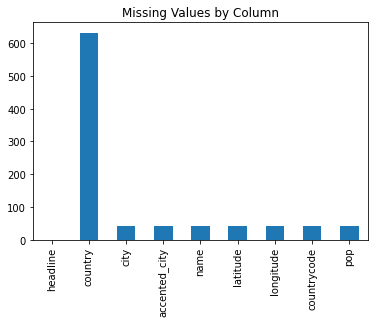

In [110]:
_=myData.isna().sum().plot.bar(title='Missing Values by Column')

In [111]:
# We have a lot of missing country details, so we remove it. 

In [112]:
myData=myData.drop(columns=['country'])

In [113]:
myData.head(4)

,headline,city,accented_city,name,latitude,longitude,countrycode,pop
0,Zika Outbreak Hits Miami,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,New York City,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,Recife,-8.05389,-34.88111,BR,1478098.0


We investigate headlines that do not have the name

In [114]:
pd.options.display.max_columns=100
no_name=myData[myData['name'].isna()].copy()
print(f'There are {len(no_name)} headlines without a city.')

There are 42 headlines without a city.


In [115]:
no_name.tail()

,headline,city,accented_city,name,latitude,longitude,countrycode,pop
596,Zika arrives in Dangriga,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,More Patients in Maynard are Getting Diagnosed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,Zika case reported in Antioquia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,Chikungunya has not Left Pismo Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,Zika spreads to La Joya,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can check a few of the above details to make sure that we can't find the the city from headline

In [116]:
city_set=set(city_accented_mapping.keys())


In [117]:
for city in ['Dangriga','Maynard','Antioquia','Pismo Beach','La Joya']:
  if city in city_set:
    print('Found', city)
  else:
    print('Did not Find City')

Did not Find City
Did not Find City
Did not Find City
Did not Find City
Did not Find City


The 42 headlines with the city name may have a city, but it is not included in the geonamescache, since the cities are unusable we remove them. 

In [118]:
myData=myData.dropna(subset=['name'])

In [119]:
myData.tail()

,headline,city,accented_city,name,latitude,longitude,countrycode,pop
642,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Jerusalem,Jerusalem,31.76904,35.21633,IL,801000.0
643,More Zika patients reported in Indang,Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
644,Suva authorities confirmed the spread of Rotav...,Suva,Suva,Suva,-18.14161,178.44149,FJ,77366.0
645,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,Bella Vista,18.45539,-69.94540,DO,175683.0
646,Zika Outbreak in Wichita Falls,Wichita Falls,Wichita Falls,Wichita Falls,33.91371,-98.49339,US,104710.0


In [120]:
myData.sample(5)

,headline,city,accented_city,name,latitude,longitude,countrycode,pop
267,More people in Indianapolis are infected with ...,Indianapolis,Indianapolis,Indianapolis,39.76838,-86.15804,US,829718.0
539,West Nile Virus Hits Monroe,Monroe,Monroe,Monroe,32.50931,-92.11930,US,49598.0
389,West Nile Virus Exposure in Racine,Racine,Racine,Racine,42.72613,-87.78285,US,77742.0
280,Zika symptoms spotted in Arlington,Arlington,Arlington,Arlington,32.73569,-97.10807,US,388125.0
275,Phnom Penh hit by Zika Threat,Phnom Penh,Phnom Penh,Phnom Penh,11.56245,104.91601,KH,1573544.0


In [121]:
myData.describe()

,latitude,longitude,pop
count,605.000000,605.000000,6.050000e+02
mean,26.730761,-38.233048,8.910827e+05
std,20.631955,79.475181,1.973884e+06
min,-53.787690,-156.506040,1.338100e+04
25%,15.711800,-90.444300,5.952300e+04
50%,33.749000,-76.496610,1.713800e+05
75%,40.714270,7.095490,6.480340e+05
max,59.938630,179.364510,1.307630e+07


In [122]:
print(f'We have  the city locations for {len(myData)} cities')

We have  the city locations for 605 cities


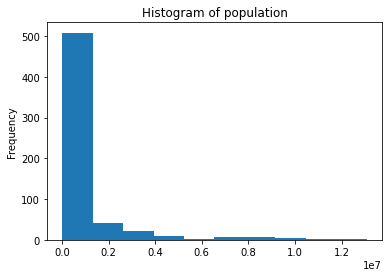

In [123]:
_=myData['pop'].plot.hist(title='Histogram of population')

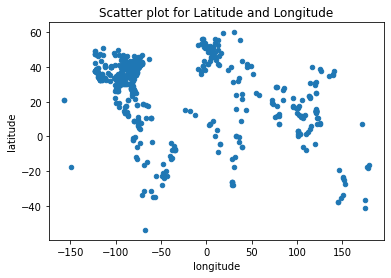

In [124]:
_=myData.plot.scatter(x='longitude',y='latitude', title='Scatter plot for Latitude and Longitude')

We do a final clean up by removing the name column since it is redundant with the city.  

In [125]:
myData=myData.drop(columns=['name'])

In [126]:
myData.tail()

,headline,city,accented_city,latitude,longitude,countrycode,pop
642,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Jerusalem,31.76904,35.21633,IL,801000.0
643,More Zika patients reported in Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
644,Suva authorities confirmed the spread of Rotav...,Suva,Suva,-18.14161,178.44149,FJ,77366.0
645,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,18.45539,-69.94540,DO,175683.0
646,Zika Outbreak in Wichita Falls,Wichita Falls,Wichita Falls,33.91371,-98.49339,US,104710.0


In [127]:
myData[['headline','city','latitude','longitude','countrycode']].head(10)

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


The DataFrame is the final output for this step, We can now cluster headlines based on the geographical locations. 

In [128]:
myData.to_csv('/content/processed_headlines_locations.csv')

## Summary

We have:
a) Read the parsed headlines into a dataframe, b) found the location of the city mentioned in the headlines, c) kept the largest city if a city in geonames has multiple times entries d) joined the cities and the headlines e) clearned up the final dataframe to only headlines with a location. Next we move to clustering an visualization of the headlines.

In [130]:
import pandas as pd


# Clustering Headlines Based on Location

We use both KMeans clustering and DBSCAN algorithms for clustering. We then visualize the clusters on a word map. 



1.   Apply kmeans clustering and DBSCAN algorithms
2.   Visualize the clusters on the world map using the Basemap library
3.   A different algorithm will be used... 
4.    Try using DBSCAN with the greate circle distance two..
5.    Reapeat until a point is assigned a cluster closer to it. 




In [131]:
# to read the data
myData=pd.read_csv('/content/processed_headlines_locations.csv', index_col=0)
myData[['headline','city','latitude','longitude','countrycode']].head()

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US


In [132]:
myData.head()

,headline,city,accented_city,latitude,longitude,countrycode,pop
0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,1300092.0


In [133]:
print('Missing Values: ')
myData.isna().sum()

Missing Values: 


headline         0
city             0
accented_city    0
latitude         0
longitude        0
countrycode      0
pop              0
dtype: int64

In [134]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 646
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   headline       605 non-null    object 
 1   city           605 non-null    object 
 2   accented_city  605 non-null    object 
 3   latitude       605 non-null    float64
 4   longitude      605 non-null    float64
 5   countrycode    605 non-null    object 
 6   pop            605 non-null    float64
dtypes: float64(3), object(4)
memory usage: 37.8+ KB


## Clustering Using DBSCAN

First we use DBSCAN algorithm, is a density based algorithm for clustering a set points that works by grouping together cluster points with many close neighbors. 


In [135]:
from sklearn.cluster import DBSCAN
clusterer=DBSCAN()
clusterer

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### Distance Metric: Euclidean

In [136]:
def cluster_location(clusterer,myData, lat_string='latitude',lon_string='longitude'):
  """
  Fit a clustering algorithm on location data. 
  """
  features=myData[[lat_string, lon_string]].copy()
  clusterer.fit(features)
  myData['cluster']=clusterer.labels_
  return myData


In [137]:
myData=cluster_location(clusterer, myData)

In [138]:
myData['cluster'].value_counts()

-1    476
 4     26
 1     21
 0     19
 6     14
 7     12
 3     12
 5      8
 9      6
 2      6
 8      5
Name: cluster, dtype: int64

In [139]:
# parameter documentation for DBSCAN - eps

In [140]:
clusterer.eps=9
myData=cluster_location(clusterer, myData)
myData['cluster'].value_counts()

 0     371
 2      59
 3      57
-1      32
 1      21
 5      16
 8       9
 4       9
 6       8
 11      7
 9       6
 7       6
 10      4
Name: cluster, dtype: int64

In [141]:
# Number of minimum samples
clusterer.min_samples=3
myData=cluster_location(clusterer, myData)
myData['cluster'].value_counts()

 0     373
 4      62
 2      59
 1      21
-1      16
 8      16
 11      9
 10      9
 5       9
 9       8
 12      6
 7       6
 3       5
 13      3
 6       3
Name: cluster, dtype: int64

In [142]:
best_euclidean_clusterer=DBSCAN(eps=9,min_samples=3, metric='euclidean',)
myData=cluster_location(best_euclidean_clusterer, myData)

## Visualizing the Clusters

In [143]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (180 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pre

In [144]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
plt.rcParams['font.size']=18

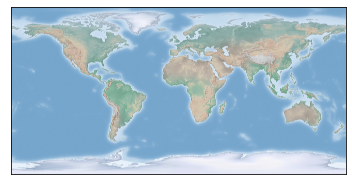

In [146]:
m=Basemap()
_=m.shadedrelief()

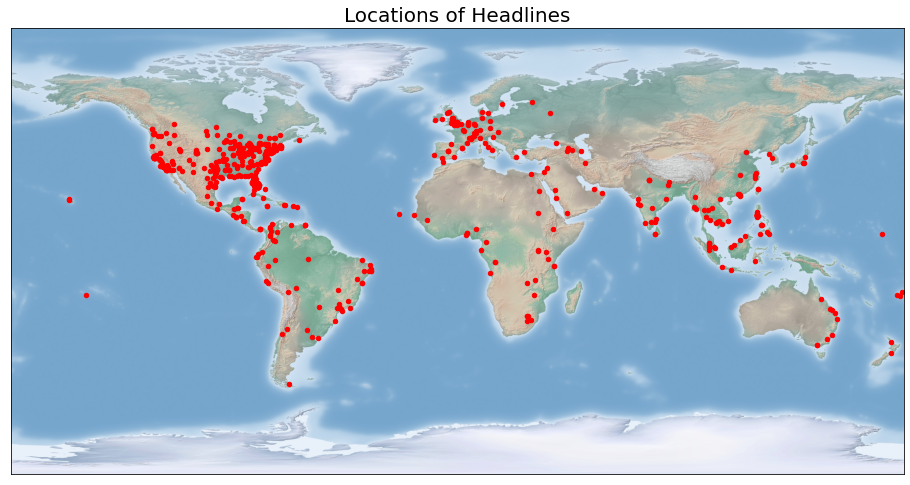

In [147]:
#make an empty figure
plt.figure(figsize=(16,10))
# convert the longitude, latitude to map projectiion coodinates
x,y=m(x=myData['longitude'], y=myData['latitude'])
m.shadedrelief()
#plot the headline locations
plt.scatter(x,y, 20,marker='o', color='red')
#grab the current axis to se the title (gca)
ax=plt.gca()
_=ax.set_title('Locations of Headlines',size=20)

## Plotting the Clusters

We need to associte colors with each cluster.We iterate through each cluster at a time with a different color. 

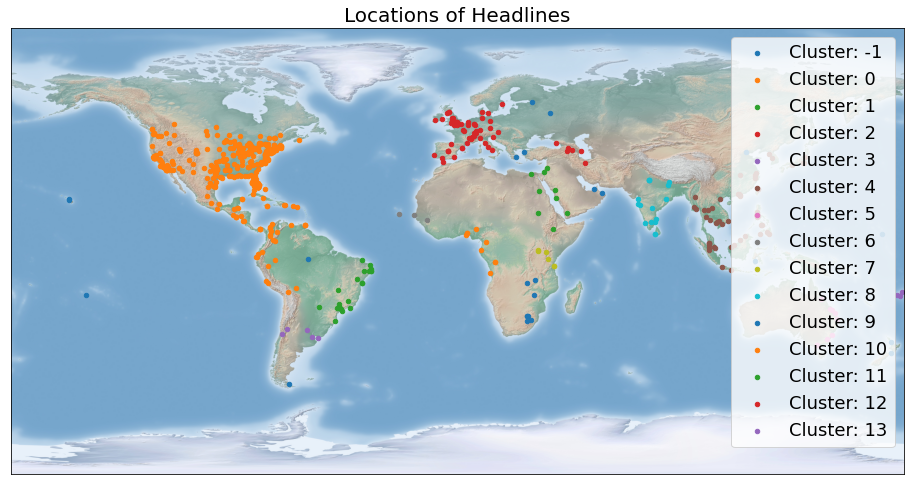

In [ ]:
plt.figure(figsize=(16,10))
m.shadedrelief()
myData['x'], myData['y']=x,y
#iterate through each cluster and plot
for cluster, grouped in myData.groupby('cluster'):
  plt.scatter(grouped['x'], grouped['y'], 20,marker='o', label=f'Cluster: {cluster}')
#grab the figure to set the title and make a legend
ax=plt.gca()
ax.legend()
_=ax.set_title('Locations of Headlines', size=20)

In [ ]:
def plot_clusters(data):
  '''
  plot clustered data on a basemap
  '''
  plt.figure(figsize=(16,10))
  m.shadedrelief()

  #iterate through each cluster and plot
  for cluster, grouped in data.groupby('cluster'):
    if cluster==-1:
      #Handle the unassigned headlines
      plt.scatter(
        grouped['x'],
        grouped['y'],
        s=60,
        alpha=0.8,
        marker='o',
        label=f'Cluster: None',
        c='k',  
      )
    else:
      plt.scatter(
          grouped['x'],
          grouped['y'],
          s=60,
          alpha=0.8,
          marker='o',
          label=f'Cluster: {cluster}',

      )
  ax=plt.gca()
  ax.legend(loc=(1,0))
  _=ax.set_title('Locations of Headlines', size=20)
  


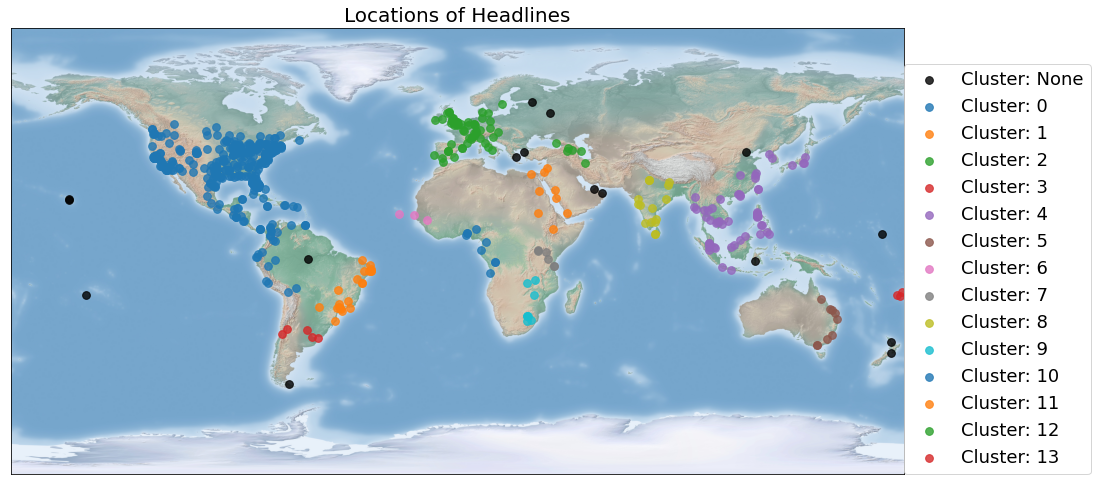

In [ ]:
plot_clusters(myData)
plt.savefig('/content/euclidean_clustering_map.png')

## Great Circle Distance and the Haversine Formula

In [ ]:
import numpy as np

In [ ]:
def great_circle_distance(coord1, coord2,radius=3956):
  '''
  Calculates the great circle distance between two coordinates 
  or arrays of coordinates.
  '''
  if np.array_equal(coord1, coord2):
    return 0.0
  #Convert lat/lon to radians
  coord1, coord2=np.radians(coord1), np.radians(coord2)
  #find the difference between the coordinates
  delta_x, delta_y=coord2-coord1

  #apply Haversin formula
  haversin=np.sin(delta_x/2)**2 +np.product(
      [np.cos(coord1[0]), np.cos(coord2[0]), np.sin(delta_y/2)**2]
  )
  #convert the distance in miles
  return 2*radius*np.arcsin(haversin **0.5)

In [ ]:
# when we pass in coordinates, each column of the array should be a point
# The first column contains latitude and the second the longitude 

In [ ]:
myData.head()

,headline,city,accented_city,latitude,longitude,countrycode,pop,cluster,x,y
0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0,0,-80.19366,25.77427
1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0,0,-74.00597,40.71427
2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0,0,-80.13005,25.79065
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0,1,-34.88111,-8.05389
4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,1300092.0,0,-96.80667,32.78306


In [ ]:
coord1=np.array(
    [
    [myData['latitude'].iloc[0], myData['latitude'].iloc[1]],
    [myData['longitude'].iloc[0], myData['longitude'].iloc[1]],
    ]
)



In [ ]:
coord2=np.array(
    [
    [myData['latitude'].iloc[2], myData['latitude'].iloc[0]],
    [myData['longitude'].iloc[2], myData['longitude'].iloc[0]],
    ]
)

In [ ]:
great_circle_distance(coord1,coord2)

array([   1.14462609, 1031.53567987])

In [ ]:
from IPython.display import Image
Image('/content/distance-check.png')

In [ ]:
great_circle_clusterer=DBSCAN(eps=250, min_samples=4,metric=great_circle_distance,)


## Using the Great Circle Distance

In [ ]:
#Cluster using great circl distance
myData=cluster_location(
    great_circle_clusterer,myData,lon_string='longitude',lat_string='latitude'
    )



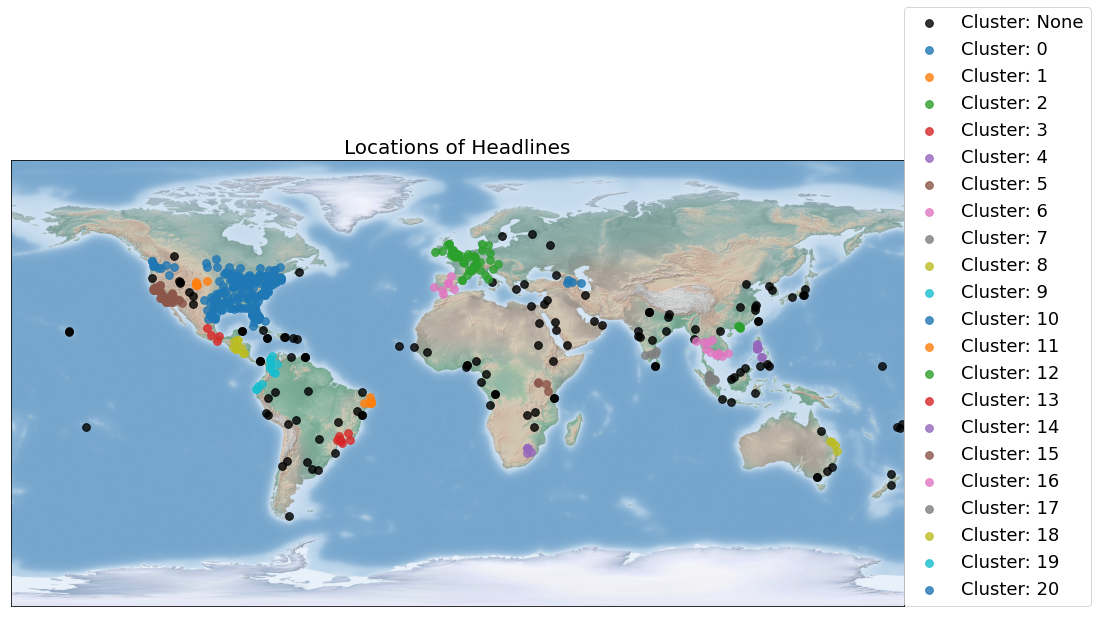

In [ ]:
_=plot_clusters(myData)

In [ ]:
myData['cluster'].value_counts()

 0     237
-1     133
 5      59
 2      49
 4      16
 10     11
 6      11
 8      10
 9       9
 11      8
 16      8
 3       8
 7       7
 1       6
 14      5
 12      4
 20      4
 18      4
 13      4
 15      4
 17      4
 19      4
Name: cluster, dtype: int64

In [ ]:
manhattan_clusterer=DBSCAN(eps=9,min_samples=3,metric='manhattan',)

In [ ]:
myData=cluster_location(manhattan_clusterer, myData)

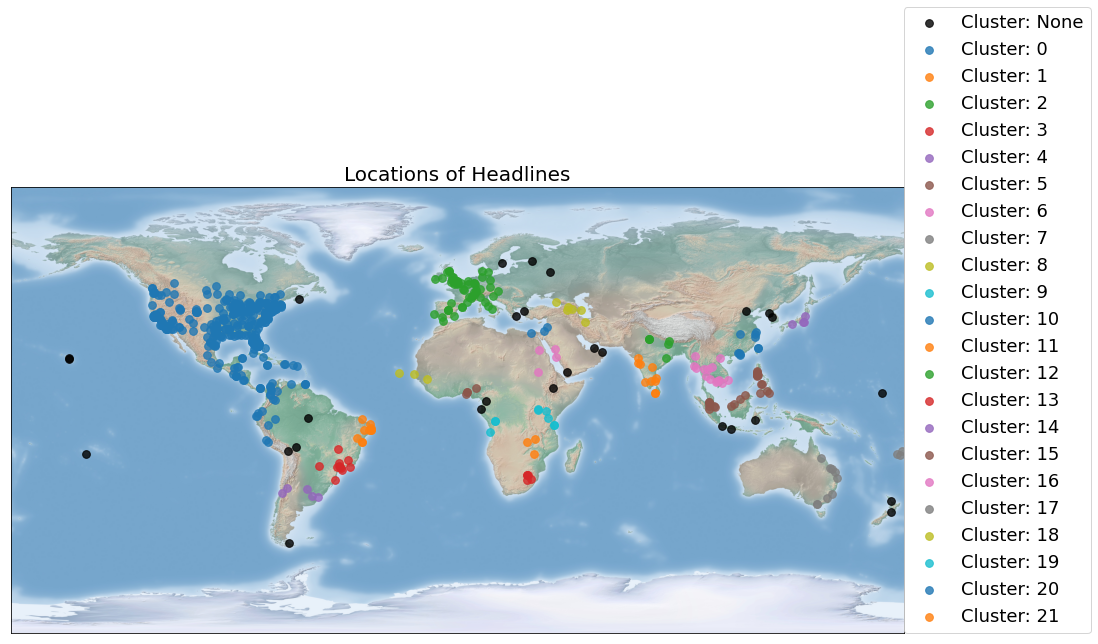

In [ ]:
_=plot_clusters(myData)

## KMeans Clustering 